1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [395]:
import pandas as pd
import numpy as np

In [396]:
iris = pd.read_csv('../data/iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [397]:
from sklearn import preprocessing

In [398]:
variety = iris['variety']

In [399]:
le_variety = preprocessing.LabelEncoder()

In [400]:
y = le_variety.fit_transform(variety)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [401]:
le_variety.inverse_transform([0, 1, 2])

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

### Setosa --> 0

### Versicolor --> 1

### Virginica --> 2

In [402]:
X = iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values  # --> Así paso estas columnas a array

In [403]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# Generando el modelo k=3 - TEST 20%

In [404]:
from sklearn.neighbors import KNeighborsClassifier
model1_k3 = KNeighborsClassifier(n_neighbors=3)  # ---> Generando modelo con k=3

### Entrenando el modelo

In [405]:
model1_k3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [406]:
prediccion1_k3_1 = model1_k3.predict([[15.7,2.8,9.5,0.1]])
print(prediccion1_k3_1)


# La predicción con k=3 dio VIRGINICA

[2]


In [407]:
prediccion1_k3_2 = model1_k3.predict([[1.7,3.8,4.5,11.3]])
print(prediccion1_k3_2)


# La predicción con k=3 dio también VIRGINICA

[2]


# Generando el modelo k=7 - TEST 20%

In [408]:
model1_k7 = KNeighborsClassifier(n_neighbors=7) # ---> Generando modelo con k=7

### Entrenando modelo

In [409]:
model1_k7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [410]:
prediccion1_k7_1 = model1_k7.predict([[15.7,2.8,9.5,0.1]])
print(prediccion1_k7_1)


# La predicción con k=7 dio VIRGINICA

[2]


In [411]:
prediccion1_k7_2 = model1_k7.predict([[1.7,3.8,4.5,11.3]])
print(prediccion1_k7_2)


# La predicción con k=7 dio también VIRGINICA

[2]


## SCORE para k=3 y k=7 (TEST 20%)

In [412]:
print('SCORE Train - k=3 (Test 20%):', model1_k3.score(X_train, y_train))
print('SCORE Test  - k=3 (Test 20%):', model1_k3.score(X_test, y_test))
print('SCORE Train - k=7 (Test 20%):', model1_k7.score(X_train, y_train))
print('SCORE Test  - k=7 (Test 20%):', model1_k7.score(X_test, y_test))

SCORE Train - k=3 (Test 20%): 0.95
SCORE Test  - k=3 (Test 20%): 1.0
SCORE Train - k=7 (Test 20%): 0.975
SCORE Test  - k=7 (Test 20%): 0.9666666666666667


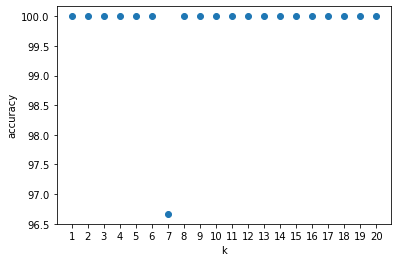

In [413]:
import matplotlib.pyplot as plt

k_range = range(1, 21)
scores1 = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores1[k] = knn.score(X_test, y_test) * 100
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores1.values()))
ejeX = range(1, 21)
plt.xticks(ejeX);

In [414]:
scores1

{1: 100.0,
 2: 100.0,
 3: 100.0,
 4: 100.0,
 5: 100.0,
 6: 100.0,
 7: 96.66666666666667,
 8: 100.0,
 9: 100.0,
 10: 100.0,
 11: 100.0,
 12: 100.0,
 13: 100.0,
 14: 100.0,
 15: 100.0,
 16: 100.0,
 17: 100.0,
 18: 100.0,
 19: 100.0,
 20: 100.0}

# Ahora usamos TEST = 60%

In [415]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size= 0.6, random_state=42)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(60, 4)
(90, 4)
(60,)
(90,)


In [416]:
model2_k3 = KNeighborsClassifier(n_neighbors=3)  # ---> Generando modelo con k=3
model2_k3.fit(X_train2, y_train2)                # ---> Entrenando modelo con k=3

KNeighborsClassifier(n_neighbors=3)

In [417]:
prediccion2_k3_1 = model2_k3.predict([[15.7,2.8,9.5,0.1]])
print(prediccion1_k7_1)


# La predicción con k=3 dio VIRGINICA

[2]


In [418]:
prediccion2_k3_2 = model2_k3.predict([[1.7,3.8,4.5,11.3]])
print(prediccion2_k3_2)


# La predicción con k=3 dio también VIRGINICA

[2]


In [419]:
model2_k7 = KNeighborsClassifier(n_neighbors=7)  # ---> Generando modelo con k=7
model2_k7.fit(X_train2, y_train2)                # ---> Entrenando modelo con k=7

KNeighborsClassifier(n_neighbors=7)

In [420]:
prediccion2_k7_1 = model2_k7.predict([[15.7,2.8,9.5,0.1]])
print(prediccion2_k7_1)


# La predicción con k=7 dio VIRGINICA

[2]


In [421]:
prediccion2_k7_2 = model2_k7.predict([[1.7,3.8,4.5,11.3]])
print(prediccion2_k7_2)


# La predicción con k=3 dio también VIRGINICA

[2]


## SCORE para k=3 y k=7 (TEST 60%)

In [422]:
print('SCORE Train - k=3 (Test 60%):', model2_k3.score(X_train2, y_train2))
print('SCORE Test  - k=3 (Test 60%):', model2_k3.score(X_test2, y_test2))
print('SCORE Train - k=7 (Test 60%):', model2_k7.score(X_train2, y_train2))
print('SCORE Test  - k=7 (Test 60%):', model2_k7.score(X_test2, y_test2))
print('')
print('SCORE Train - k=3 (Test 20%):', model1_k3.score(X_train, y_train))
print('SCORE Test  - k=3 (Test 20%):', model1_k3.score(X_test, y_test))
print('SCORE Train - k=7 (Test 20%):', model1_k7.score(X_train, y_train))
print('SCORE Test  - k=7 (Test 20%):', model1_k7.score(X_test, y_test))

SCORE Train - k=3 (Test 60%): 0.95
SCORE Test  - k=3 (Test 60%): 0.9555555555555556
SCORE Train - k=7 (Test 60%): 0.9333333333333333
SCORE Test  - k=7 (Test 60%): 0.9666666666666667

SCORE Train - k=3 (Test 20%): 0.95
SCORE Test  - k=3 (Test 20%): 1.0
SCORE Train - k=7 (Test 20%): 0.975
SCORE Test  - k=7 (Test 20%): 0.9666666666666667


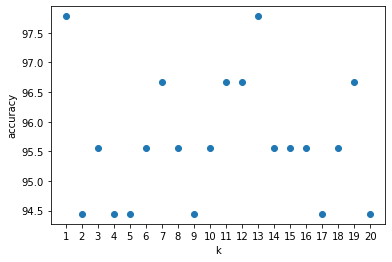

In [423]:
k_range = range(1, 21)
scores2 = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train2, y_train2)
    scores2[k] = knn.score(X_test2, y_test2) * 100
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores2.values()))
ejeX = list(range(1, 21))
plt.xticks(ejeX);

In [424]:
scores2

{1: 97.77777777777777,
 2: 94.44444444444444,
 3: 95.55555555555556,
 4: 94.44444444444444,
 5: 94.44444444444444,
 6: 95.55555555555556,
 7: 96.66666666666667,
 8: 95.55555555555556,
 9: 94.44444444444444,
 10: 95.55555555555556,
 11: 96.66666666666667,
 12: 96.66666666666667,
 13: 97.77777777777777,
 14: 95.55555555555556,
 15: 95.55555555555556,
 16: 95.55555555555556,
 17: 94.44444444444444,
 18: 95.55555555555556,
 19: 96.66666666666667,
 20: 94.44444444444444}

## Los resultados cuando el conjunto de TRAIN es del 60% siguen siendo bastante buenos, pero un poco peores en normal general que los que tenían un conjunto TRAIN del 20%.

---

# ELIMINANDO CLASE SETOSA --> Repito proceso

In [425]:
iris[iris.variety == 'Setosa'].index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

In [426]:
iris_sin_setosa = iris.drop(iris[iris.variety == 'Setosa'].index)
iris_sin_setosa

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [427]:
variety_sin_setosa = iris_sin_setosa['variety']

In [428]:
le_variety_sin_setosa = preprocessing.LabelEncoder()

In [429]:
y_sin_setosa = le_variety_sin_setosa.fit_transform(variety_sin_setosa)
y_sin_setosa

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [430]:
le_variety_sin_setosa.inverse_transform([0, 1])

array(['Versicolor', 'Virginica'], dtype=object)

### Versicolor --> 0

### Virginica --> 1

In [431]:
X_sin_setosa = iris_sin_setosa[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values  # --> Así paso estas columnas a array

In [432]:
X_train_sin_setosa, X_test_sin_setosa, y_train_sin_setosa, y_test_sin_setosa = train_test_split(X_sin_setosa, y_sin_setosa, test_size= 0.2, random_state=42)
print(X_train_sin_setosa.shape)
print(X_test_sin_setosa.shape)
print(y_train_sin_setosa.shape)
print(y_test_sin_setosa.shape)

(80, 4)
(20, 4)
(80,)
(20,)


# Generando el modelo k=3 - TEST 20%

In [433]:
model1_sin_setosa_k3 = KNeighborsClassifier(n_neighbors=3)  # ---> Generando modelo con k=3

In [434]:
model1_sin_setosa_k3.fit(X_train_sin_setosa, y_train_sin_setosa)

KNeighborsClassifier(n_neighbors=3)

In [435]:
prediccion1_sin_setosa_k3_1 = model1_sin_setosa_k3.predict([[15.7,2.8,9.5,0.1]])
print(prediccion1_sin_setosa_k3_1)


# La predicción con k=3 dio VIRGINICA

[1]


In [436]:
prediccion1_sin_setosa_k3_2 = model1_sin_setosa_k3.predict([[1.7,3.8,4.5,11.3]])
print(prediccion1_sin_setosa_k3_2)


# La predicción con k=3 dio también VIRGINICA

[1]


# Generando el modelo k=7 - TEST 20%

In [437]:
model1_sin_setosa_k7 = KNeighborsClassifier(n_neighbors=7) # ---> Generando modelo con k=7
model1_sin_setosa_k7.fit(X_train_sin_setosa, y_train_sin_setosa)

prediccion1_sin_setosa_k7_1 = model1_sin_setosa_k7.predict([[15.7,2.8,9.5,0.1]])
print(prediccion1_sin_setosa_k7_1)
# La predicción con k=7 dio VIRGINICA

prediccion1_sin_setosa_k7_2 = model1_sin_setosa_k7.predict([[1.7,3.8,4.5,11.3]])
print(prediccion1_sin_setosa_k7_2)
# La predicción con k=7 dio también VIRGINICA

[1]
[1]


In [438]:
print('SCORE Train - k=3 (Test 20%) - Sin setosa:', model1_sin_setosa_k3.score(X_train_sin_setosa, y_train_sin_setosa))
print('SCORE Test  - k=3 (Test 20%) - Sin setosa:', model1_sin_setosa_k3.score(X_test_sin_setosa, y_test_sin_setosa))
print('SCORE Train - k=7 (Test 20%) - Sin setosa:', model1_sin_setosa_k7.score(X_train_sin_setosa, y_train_sin_setosa))
print('SCORE Test  - k=7 (Test 20%) - Sin setosa:', model1_sin_setosa_k7.score(X_test_sin_setosa, y_test_sin_setosa))

SCORE Train - k=3 (Test 20%) - Sin setosa: 0.975
SCORE Test  - k=3 (Test 20%) - Sin setosa: 0.85
SCORE Train - k=7 (Test 20%) - Sin setosa: 0.975
SCORE Test  - k=7 (Test 20%) - Sin setosa: 0.9


## Sin setosa - K de 1 a 20 - TEST 20%

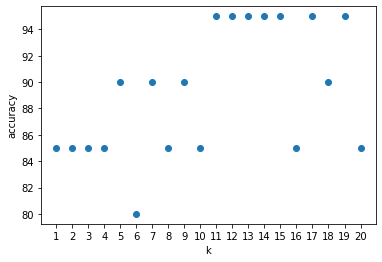

In [439]:
import matplotlib.pyplot as plt

k_range = range(1, 21)
scores1_sin_setosa = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_sin_setosa, y_train_sin_setosa)
    scores1_sin_setosa[k] = knn.score(X_test_sin_setosa, y_test_sin_setosa) * 100
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores1_sin_setosa.values()))
ejeX = range(1, 21)
plt.xticks(ejeX);

In [440]:
scores1_sin_setosa

{1: 85.0,
 2: 85.0,
 3: 85.0,
 4: 85.0,
 5: 90.0,
 6: 80.0,
 7: 90.0,
 8: 85.0,
 9: 90.0,
 10: 85.0,
 11: 95.0,
 12: 95.0,
 13: 95.0,
 14: 95.0,
 15: 95.0,
 16: 85.0,
 17: 95.0,
 18: 90.0,
 19: 95.0,
 20: 85.0}

In [441]:
scores1

{1: 100.0,
 2: 100.0,
 3: 100.0,
 4: 100.0,
 5: 100.0,
 6: 100.0,
 7: 96.66666666666667,
 8: 100.0,
 9: 100.0,
 10: 100.0,
 11: 100.0,
 12: 100.0,
 13: 100.0,
 14: 100.0,
 15: 100.0,
 16: 100.0,
 17: 100.0,
 18: 100.0,
 19: 100.0,
 20: 100.0}

# Generando el modelo k=3 y k=7 - TEST 60%

In [442]:
X_train_sin_setosa2, X_test_sin_setosa2, y_train_sin_setosa2, y_test_sin_setosa2 = train_test_split(X_sin_setosa, y_sin_setosa, test_size= 0.6, random_state=42)
print(X_train_sin_setosa2.shape)
print(X_test_sin_setosa2.shape)
print(y_train_sin_setosa2.shape)
print(y_test_sin_setosa2.shape)

(40, 4)
(60, 4)
(40,)
(60,)


In [443]:
model2_sin_setosa_k3 = KNeighborsClassifier(n_neighbors=3) # ---> Generando modelo con k=7
model2_sin_setosa_k3.fit(X_train_sin_setosa2, y_train_sin_setosa2)

prediccion2_sin_setosa_k3_1 = model2_sin_setosa_k3.predict([[15.7,2.8,9.5,0.1]])
print(prediccion2_sin_setosa_k3_1)
# La predicción con k=3 dio VIRGINICA

prediccion2_sin_setosa_k3_2 = model2_sin_setosa_k3.predict([[1.7,3.8,4.5,11.3]])
print(prediccion2_sin_setosa_k3_2)
# La predicción con k=3 dio también VIRGINICA

[1]
[1]


In [444]:
model2_sin_setosa_k7 = KNeighborsClassifier(n_neighbors=7) # ---> Generando modelo con k=7
model2_sin_setosa_k7.fit(X_train_sin_setosa2, y_train_sin_setosa2)

prediccion2_sin_setosa_k7_1 = model2_sin_setosa_k7.predict([[15.7,2.8,9.5,0.1]])
print(prediccion2_sin_setosa_k7_1)
# La predicción con k=3 dio VIRGINICA

prediccion2_sin_setosa_k7_2 = model2_sin_setosa_k7.predict([[1.7,3.8,4.5,11.3]])
print(prediccion2_sin_setosa_k7_2)
# La predicción con k=3 dio también VIRGINICA

[1]
[1]


In [445]:
print('SCORE Train - k=3 (Test 60%) - Sin setosa:', model2_sin_setosa_k3.score(X_train_sin_setosa2, y_train_sin_setosa2))
print('SCORE Test  - k=3 (Test 60%) - Sin setosa:', model2_sin_setosa_k3.score(X_test_sin_setosa2, y_test_sin_setosa2))
print('SCORE Train - k=7 (Test 60%) - Sin setosa:', model2_sin_setosa_k7.score(X_train_sin_setosa2, y_train_sin_setosa2))
print('SCORE Test  - k=7 (Test 60%) - Sin setosa:', model2_sin_setosa_k7.score(X_test_sin_setosa2, y_test_sin_setosa2))

SCORE Train - k=3 (Test 60%) - Sin setosa: 1.0
SCORE Test  - k=3 (Test 60%) - Sin setosa: 0.9333333333333333
SCORE Train - k=7 (Test 60%) - Sin setosa: 0.95
SCORE Test  - k=7 (Test 60%) - Sin setosa: 0.95


## Sin setosa - K de 1 a 20 - TEST 60%

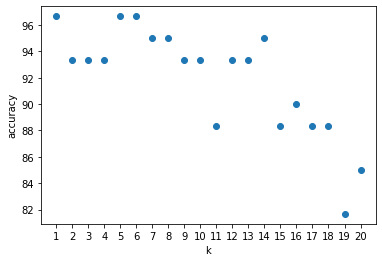

In [446]:
k_range = range(1, 21)
scores2_sin_setosa = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_sin_setosa2, y_train_sin_setosa2)
    scores2_sin_setosa[k] = knn.score(X_test_sin_setosa2, y_test_sin_setosa2) * 100
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores2_sin_setosa.values()))
ejeX = list(range(1, 21))
plt.xticks(ejeX);

In [447]:
scores2_sin_setosa

{1: 96.66666666666667,
 2: 93.33333333333333,
 3: 93.33333333333333,
 4: 93.33333333333333,
 5: 96.66666666666667,
 6: 96.66666666666667,
 7: 95.0,
 8: 95.0,
 9: 93.33333333333333,
 10: 93.33333333333333,
 11: 88.33333333333333,
 12: 93.33333333333333,
 13: 93.33333333333333,
 14: 95.0,
 15: 88.33333333333333,
 16: 90.0,
 17: 88.33333333333333,
 18: 88.33333333333333,
 19: 81.66666666666667,
 20: 85.0}

In [448]:
scores1_sin_setosa

{1: 85.0,
 2: 85.0,
 3: 85.0,
 4: 85.0,
 5: 90.0,
 6: 80.0,
 7: 90.0,
 8: 85.0,
 9: 90.0,
 10: 85.0,
 11: 95.0,
 12: 95.0,
 13: 95.0,
 14: 95.0,
 15: 95.0,
 16: 85.0,
 17: 95.0,
 18: 90.0,
 19: 95.0,
 20: 85.0}

## Al hacer el ejercicio con y sin la clase "setosa", no se observan cambio significativos... Al eliminarla se ve cómo los Scores se mantienen casi iguales

## Se puede decir que KNN es un buen algoritmo para este tipo de datos por los buenos resultadoos obtenidos.